In [1]:
#----------------------------------------------------------------
# code to extract a low resolution amplitude from a spectrum
#----------------------------------------------------------------
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#-----------------------------------------------------------------------------
# function to return one unnormalized spectrum, in two columns (wave, flux)
#-----------------------------------------------------------------------------
filepath='../data/'
files = [f for f in os.listdir(filepath) if f.endswith('.csv')]
print(len(files),files)

def getspec(n):
    if (n>=len(files)):
        print('max number of files exceeded')
        return []
    d = np.genfromtxt(filepath+files[n], delimiter=',',skip_header=1)
    return d


39 ['F0T4000G5.csv', 'F0T5300G25.csv', 'F0T5300G35.csv', 'F0T5300G45.csv', 'F0T6000G35.csv', 'F0T6750G4.csv', 'Fm25T4000G0.csv', 'Fm25T4000G5.csv', 'Fm25T5300G35.csv', 'Fm25T5300G45.csv', 'Fm25T6000G35.csv', 'Fm25T6750G25.csv', 'F0T4000G0.csv', 'F0T4000G4.csv', 'F0T5500G0.csv', 'F0T5500G2.csv', 'F0T6000G2.csv', 'F0T6000G0.csv', 'F0T6000G4.csv', 'F0T5500G4.csv', 'F0T4000G2.csv', 'Fm1T4000G0.csv', 'Fm1T4000G2.csv', 'Fm1T4000G4.csv', 'Fm1T5500G2.csv', 'Fm1T5500G0.csv', 'Fm1T5500G4.csv', 'Fm1T6000G0.csv', 'Fm1T6000G2.csv', 'Fm1T6000G4.csv', 'Fm2T4000G2.csv', 'Fm2T5500G4.csv', 'Fm2T5500G2.csv', 'Fm2T5500G0.csv', 'Fm2T4000G4.csv', 'Fm2T6000G2.csv', 'Fm2T6000G0.csv', 'Fm2T4000G0.csv', 'Fm2T6000G4.csv']


NameError: name 'd' is not defined

In [76]:
#------------------------------------------------------------
# create an np array with the indexes of the breakpoints in 
# the spectra,aligning them with the breaks in the continuum
#------------------------------------------------------------
def makeBreakpoints(w):
    #-------------------------------------------
    # determine the indices of the breakpoints
    # from the wavelengths in Angstroms
    #-------------------------------------------
    wmax = max(w)
    wpts = [3647,8207,14589]
    ii = [0]
    for p in wpts:
        if (p<=wmax):
            ix = np.argwhere(w>p).item(0)
            ii.append(ix)
    ii.append(len(w)-1)
    #--------------------------------------
    # create the set of steps in lambda
    # merge with the breakpoints and sort
    #--------------------------------------
    nbins = 64
    step = np.int(np.floor((max(ii)-min(ii))/(10*nbins)))*10    
    jj = list(range(min(ii),max(ii),step))
    jj = np.unique(ii+jj)
    #----------------------------------------------------
    # prune the breakpoints on both sides of the breaks
    #----------------------------------------------------
    for i in range(1,len(ii)-1): 
        ix = ii[i]
        jj = np.delete(jj,(np.abs(jj-ix)<step) & (jj != ix))

    return jj

#-----------------------------------------------------
# compute the low-resolution envelope of spectrum(n)
#-----------------------------------------------------
def getEnv(n, brk):
    d = getspec(n)
    c = np.cumsum(d,axis=0)
    b = c[brk,:]
    db = np.diff(b,axis=0)
    dk = np.diff(brk)
    dd = (db.T/dk).T
    return dd

63


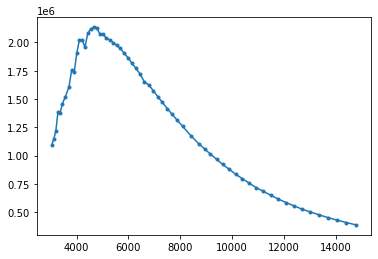

In [80]:
# for the full resolution spectra
#------------------------------------
# execute:
#  1. make the breakpoints
#  2. get the envelope for spectrum(3)
#  3. plot the course envelope
#------------------------------------
d = getspec(0)
wave = d[:,0]
bk = makeBreakpoints(wave)

e = getEnv(31, bk)
plt.plot(e[:,0],e[:,1],'.-');
print(len(bk))

In [83]:
#-------------------------------------------------------
# building a breakpoints array on the lo-res data
#-------------------------------------------------------
ww = np.load('wave.npy')
bk = makeBreakpoints(ww)
print(len(bk))
print(bk)

64
[    0   240   480   720   960  1200  1440  1680  1953  2400  2640  2880
  3120  3360  3600  3840  4080  4320  4560  4800  5040  5280  5520  5760
  6000  6240  6480  6720  6960  7200  7440  7680  7920  8160  8400  8640
  8880  9120  9360  9600 10063 10320 10560 10800 11040 11280 11520 11760
 12000 12240 12480 12720 12960 13200 13440 13680 13920 14160 14400 14640
 14880 15120 15360 15403]
